# Amostragem Estratificada:

Na amostragem estratificada, a população é dividida em subgrupos ou estratos com base em características relevantes, como gênero, idade, localização geográfica, etc. Em seguida, uma amostra é selecionada aleatoriamente dentro de cada estrato. Este método garante que a amostra represente de forma equilibrada as diferentes características da população, o que pode aumentar a precisão dos resultados. No entanto, é mais complexo e requer mais tempo e recursos do que as outras duas técnicas.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
iris = pd.read_csv('iris.csv')
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Exibir a base de dados "iris" contando os valores dacoluna "class":
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

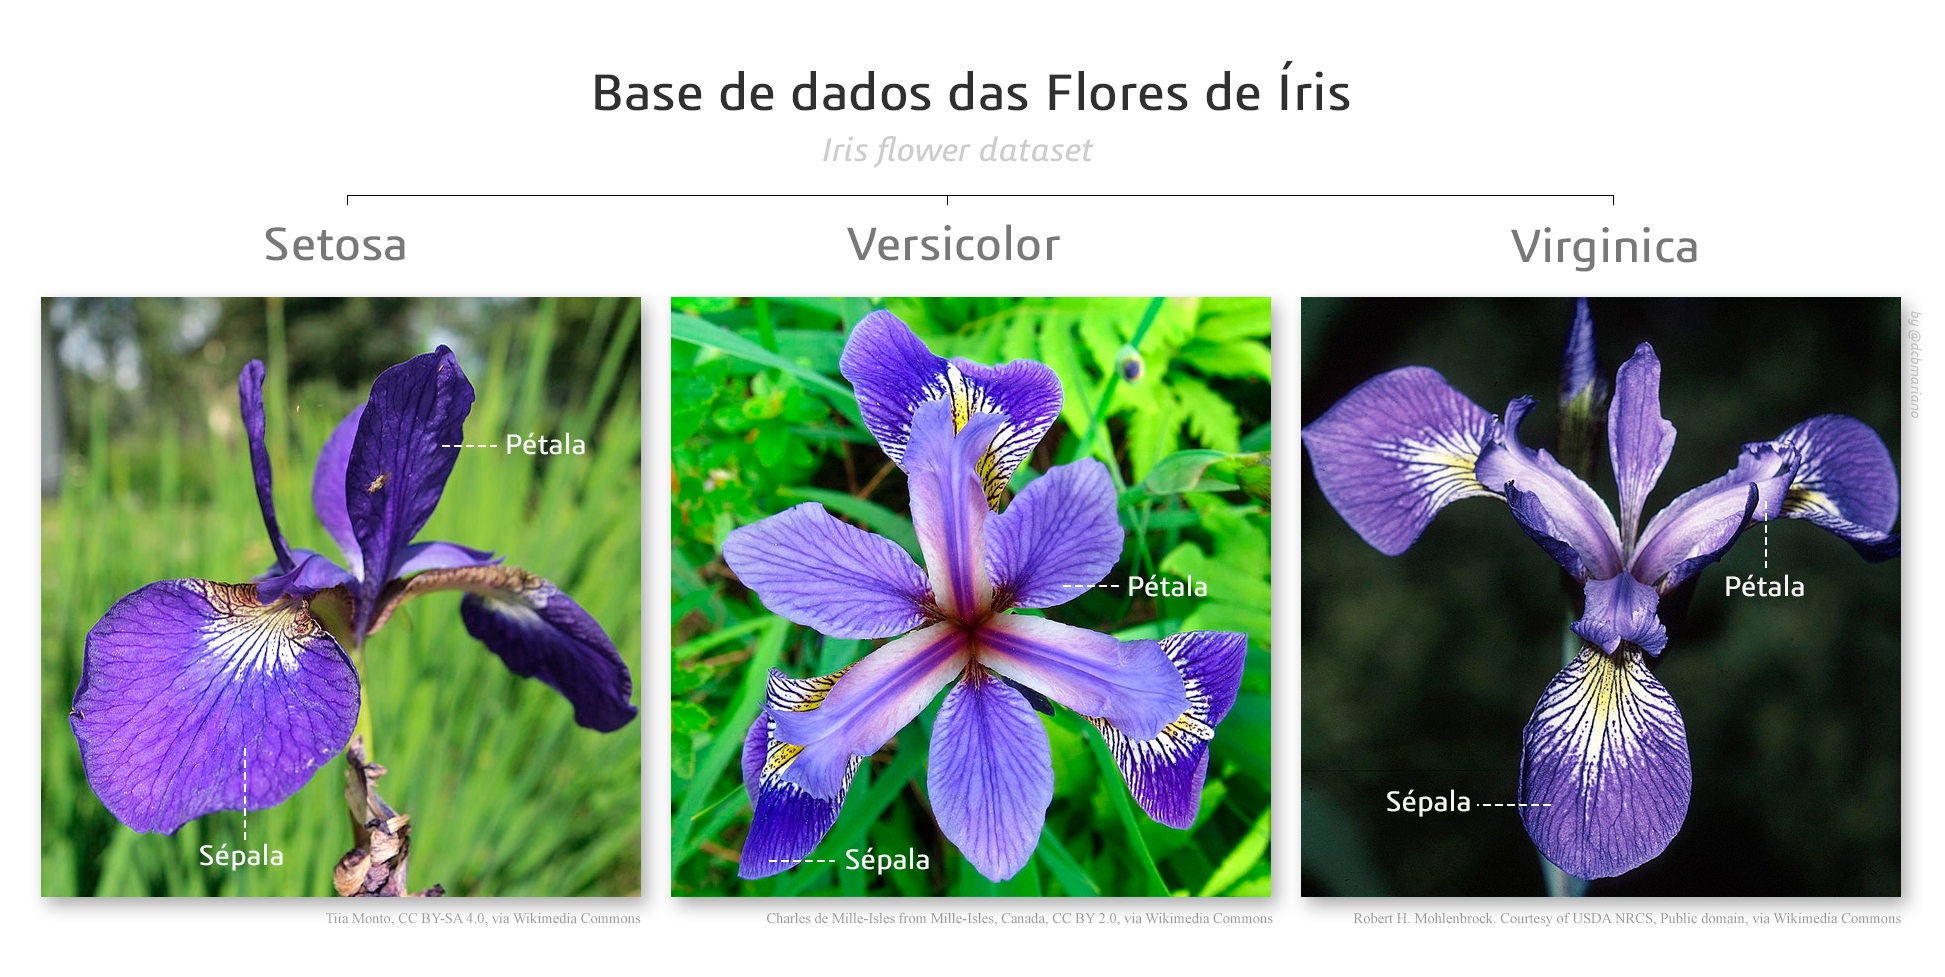

In [11]:
# Fazer uma mostragem estratíficada:
# ⚠ Os dados numéricos de pétalas e sétalas são length = comprimento e width = largura #
# ⚠ Os dados textuais referem-se às espécies das plantas, sendo Setosa, Virginica e Versicolor

## Etapa 1: Localizar somente os atributores previsores (número): iris.iloc[ : , 0:4]
## Etapa 2: Localizar somente a classe da espécie da planta (texto)
## Etapa 3: Definir a representatividade da base que será testada 
#### ↑ aqui, 50% (ou 0.5) dos dados serão copiados para as variáveis X e Y ( e _ para os outros valores):

X, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],
                              test_size=0.5, stratify=iris.iloc[:,4])


 

Iris-virginica     25
Iris-setosa        25
Iris-versicolor    25
Name: class, dtype: int64

In [16]:
X.value_counts()

sepal length  sepal width  petal length  petal width
5.8           2.7          5.1           1.9            2
4.9           3.1          1.5           0.1            2
6.1           3.0          4.6           1.4            1
6.4           2.8          5.6           2.2            1
6.3           2.5          5.0           1.9            1
                                                       ..
5.4           3.4          1.5           0.4            1
              3.0          4.5           1.5            1
5.2           3.4          1.4           0.2            1
5.1           3.8          1.6           0.2            1
7.9           3.8          6.4           2.0            1
Length: 73, dtype: int64

In [13]:
y.value_counts()

Iris-virginica     25
Iris-setosa        25
Iris-versicolor    25
Name: class, dtype: int64

In [18]:
# Testar com dados da base de infertilidade:
infert = pd.read_csv('infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [19]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [21]:
X1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                                test_size=0.6, stratify=infert.iloc[:, 1])

In [23]:
X1.value_counts()

age  parity  induced  case  spontaneous  stratum  pooled.stratum
42   1       0        0     0            2        1                 2
35   1       0        0     0            42       11                2
32   1       0        0     0            31       10                2
34   1       0        0     0            63       47                2
21   1       0        0     0            67       39                1
                                                                   ..
28   2       1        0     0            47       51                1
             0        0     1            10       19                1
                            0            23       19                1
     1       1        0     0            40       8                 1
44   1       0        1     1            20       17                1
Length: 95, dtype: int64

In [24]:
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64